### Dependencies and imports

In [ ]:
!pip install pandas
!pip install psutil
!conda install -c plotly plotly-orca -y

In [1]:
import math
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Plot test 1

In this test, I map emitter to core 1, workers to core 5 and collector to core 11. The perf command is `perf stat -a -I 100 -o perf-test-1.csv -x "," -e cpu-cycles,cache-misses,instructions,cycle_activity.cycles_l3_miss -C 1,5,11 -- ./program`.

In [2]:
events = ["cpu-cycles", "cache-misses", "instructions"]
data_t1_df = pd.read_csv("../data/perf-test-1.csv", skiprows=1, header=None)
data_t1_df.tail()

,0,1,2,3,4,5,6,7,8
363,9.245369,1040462,NaN,cycle_activity.cycles_l3_miss,305483155,100,0,NaN,NaN
364,9.254295,71303049,NaN,cpu-cycles,26931103,100,0,NaN,NaN
365,9.254295,22256,NaN,cache-misses,26931609,100,0,NaN,NaN
366,9.254295,51205071,NaN,instructions,26931437,100,0,0.0,insn per cycle
367,9.254295,263473,NaN,cycle_activity.cycles_l3_miss,26931339,100,0,NaN,NaN


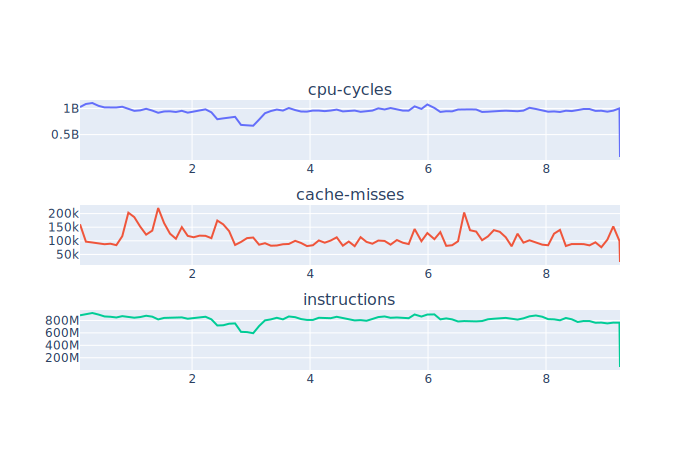

In [8]:
cols = 1
rows = math.ceil(len(events) / cols)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=events)

for i, event in enumerate(events):
    col = (i % cols) + 1
    row = math.ceil((i + 1) / cols)
    df = data_t1_df.loc[data_t1_df[3] == event]
    fig.add_trace(
        go.Scatter(x=df[0].values, y=df[1].values, mode="lines"),
        row=row,
        col=col
    )

fig.update_layout(showlegend=False)
fig.show("svg")

### Plot test 2

In this test, I map emitter to core 9, workers to core 10 and collector to core 11. The perf command is `perf stat -a -I 100 -o perf-test-2.csv -x "," -e cpu-cycles,cache-misses,instructions,cycle_activity.cycles_l3_miss -C 9,10,11 -- ./program`.

In [6]:
events = ["cpu-cycles", "cache-misses", "instructions"]
data_t2_df = pd.read_csv("../data/perf-test-2.csv", skiprows=1, header=None)
data_t2_df.tail()

,0,1,2,3,4,5,6,7,8
163,4.136950,531315,NaN,cycle_activity.cycles_l3_miss,300593858,100,0,NaN,NaN
164,4.166037,280499957,NaN,cpu-cycles,87424692,100,0,NaN,NaN
165,4.166037,42890,NaN,cache-misses,87424436,100,0,NaN,NaN
166,4.166037,223981931,NaN,instructions,87423968,100,0,0.0,insn per cycle
167,4.166037,471202,NaN,cycle_activity.cycles_l3_miss,87423739,100,0,NaN,NaN


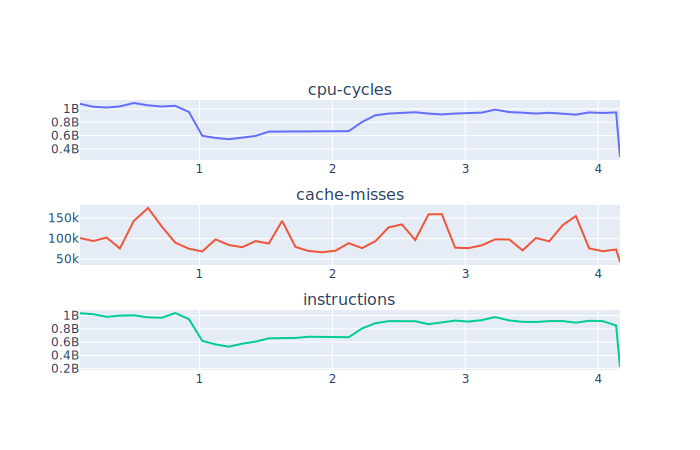

In [9]:
cols = 1
rows = math.ceil(len(events) / cols)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=events)

for i, event in enumerate(events):
    col = (i % cols) + 1
    row = math.ceil((i + 1) / cols)
    df = data_t2_df.loc[data_t2_df[3] == event]
    fig.add_trace(
        go.Scatter(x=df[0].values, y=df[1].values, mode="lines"),
        row=row,
        col=col
    )

fig.update_layout(showlegend=False)
fig.show("svg")